# Step 4: Pre-processing

## Imported Libraries and Packages

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import missingno as msno
from sklearn import __version__ as sklearn_version
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale
from sklearn.model_selection import train_test_split, cross_validate, GridSearchCV, learning_curve, cross_val_score, KFold
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.dummy import DummyRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.pipeline import make_pipeline
from sklearn.datasets import make_classification
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.tree import DecisionTreeClassifier
import warnings  
warnings.simplefilter(action="ignore", category=FutureWarning)
warnings.filterwarnings(action="ignore", module="scipy")

## Data

In [2]:
df = pd.read_csv('collegedata_EDAd.csv')
df.head(2)

,chronname,city,state,level,control,basic,hbcu,flagship,student_count,awards_per_value,...,grad_100_value,grad_150_value,pell_value,retain_value,ft_fac_value,state_sector_ct,carnegie_ct,counted_pct,cohort_size,num_similar
0,Alabama A&M University,Normal,Alabama,4-year,Public,Masters Colleges and Universities--larger prog...,yes,no,4051.0,14.2,...,10.0,29.1,71.2,63.1,82.8,13.0,386,99.7,882.0,20.0
1,University of Alabama at Birmingham,Birmingham,Alabama,4-year,Public,Research Universities--very high research acti...,no,no,11502.0,20.9,...,29.4,53.5,35.1,80.2,92.4,13.0,106,56.0,1376.0,20.0


In [3]:
print(df.shape)

(3798, 29)


In [4]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
student_count,3413.0,2552.958980,2761.697368,23.0,516.000,1492.0,3596.000,11969.0
awards_per_value,3532.0,21.491110,6.849469,3.6,17.000,20.9,25.025,40.3
awards_per_state_value,3313.0,20.951585,3.670954,12.1,18.500,21.7,23.200,31.1
awards_per_natl_value,2407.0,22.793270,1.212146,21.5,21.500,22.5,22.500,25.9
exp_award_value,3580.0,53231.429330,30491.283035,0.0,31386.250,48545.0,70972.250,143700.0
exp_award_state_value,3657.0,57636.617446,27975.482849,12346.0,35515.000,53245.0,75743.000,144220.0
exp_award_natl_value,3798.0,60903.577672,29892.281333,24795.0,37780.000,38763.0,101725.000,101725.0
ft_pct,3794.0,71.092198,25.056818,3.8,49.800,77.0,93.900,100.0
fte_value,3417.0,2157.546386,2162.321634,33.0,559.000,1388.0,2970.000,9548.0
aid_value,3424.0,6254.176694,3550.105453,294.0,3924.750,4903.5,7226.000,17309.0


In [5]:
print(df.columns)

Index(['chronname', 'city', 'state', 'level', 'control', 'basic', 'hbcu',
       'flagship', 'student_count', 'awards_per_value',
       'awards_per_state_value', 'awards_per_natl_value', 'exp_award_value',
       'exp_award_state_value', 'exp_award_natl_value', 'ft_pct', 'fte_value',
       'aid_value', 'endow_value', 'grad_100_value', 'grad_150_value',
       'pell_value', 'retain_value', 'ft_fac_value', 'state_sector_ct',
       'carnegie_ct', 'counted_pct', 'cohort_size', 'num_similar'],
      dtype='object')


## Cleaning data

In [6]:
# Drop Unnecessary variables from the dataframe
irrelevant_features_list = ['chronname', 'city', 'state']
df.drop(columns=irrelevant_features_list, inplace=True)
print(df.shape)

(3798, 26)


**Missing values:**

In [7]:
null_values= df.isna().sum()
percent_null_values = ((null_values / len(df)) * 100).sort_values(ascending=False)
print(percent_null_values)

endow_value               46.024223
awards_per_natl_value     36.624539
cohort_size               16.587678
awards_per_state_value    12.769879
counted_pct               11.242759
student_count             10.136914
fte_value                 10.031596
aid_value                  9.847288
grad_100_value             9.189047
grad_150_value             8.715113
retain_value               8.478146
awards_per_value           7.003686
state_sector_ct            6.029489
exp_award_value            5.739863
exp_award_state_value      3.712480
ft_fac_value               0.342285
ft_pct                     0.105319
pell_value                 0.026330
carnegie_ct                0.000000
level                      0.000000
control                    0.000000
exp_award_natl_value       0.000000
flagship                   0.000000
hbcu                       0.000000
basic                      0.000000
num_similar                0.000000
dtype: float64


**Impute missing values:**

In [8]:
# Fill missing values with mean of the column
df_impute_mean = df.select_dtypes(include=[np.number]).apply(lambda x: x.fillna(x.mean()), axis=0)

df_impute_mode = df.select_dtypes(exclude=[np.number]).apply(lambda x: x.fillna(x.mode()[0]))

df = pd.concat([df_impute_mean, df_impute_mode], axis=1)

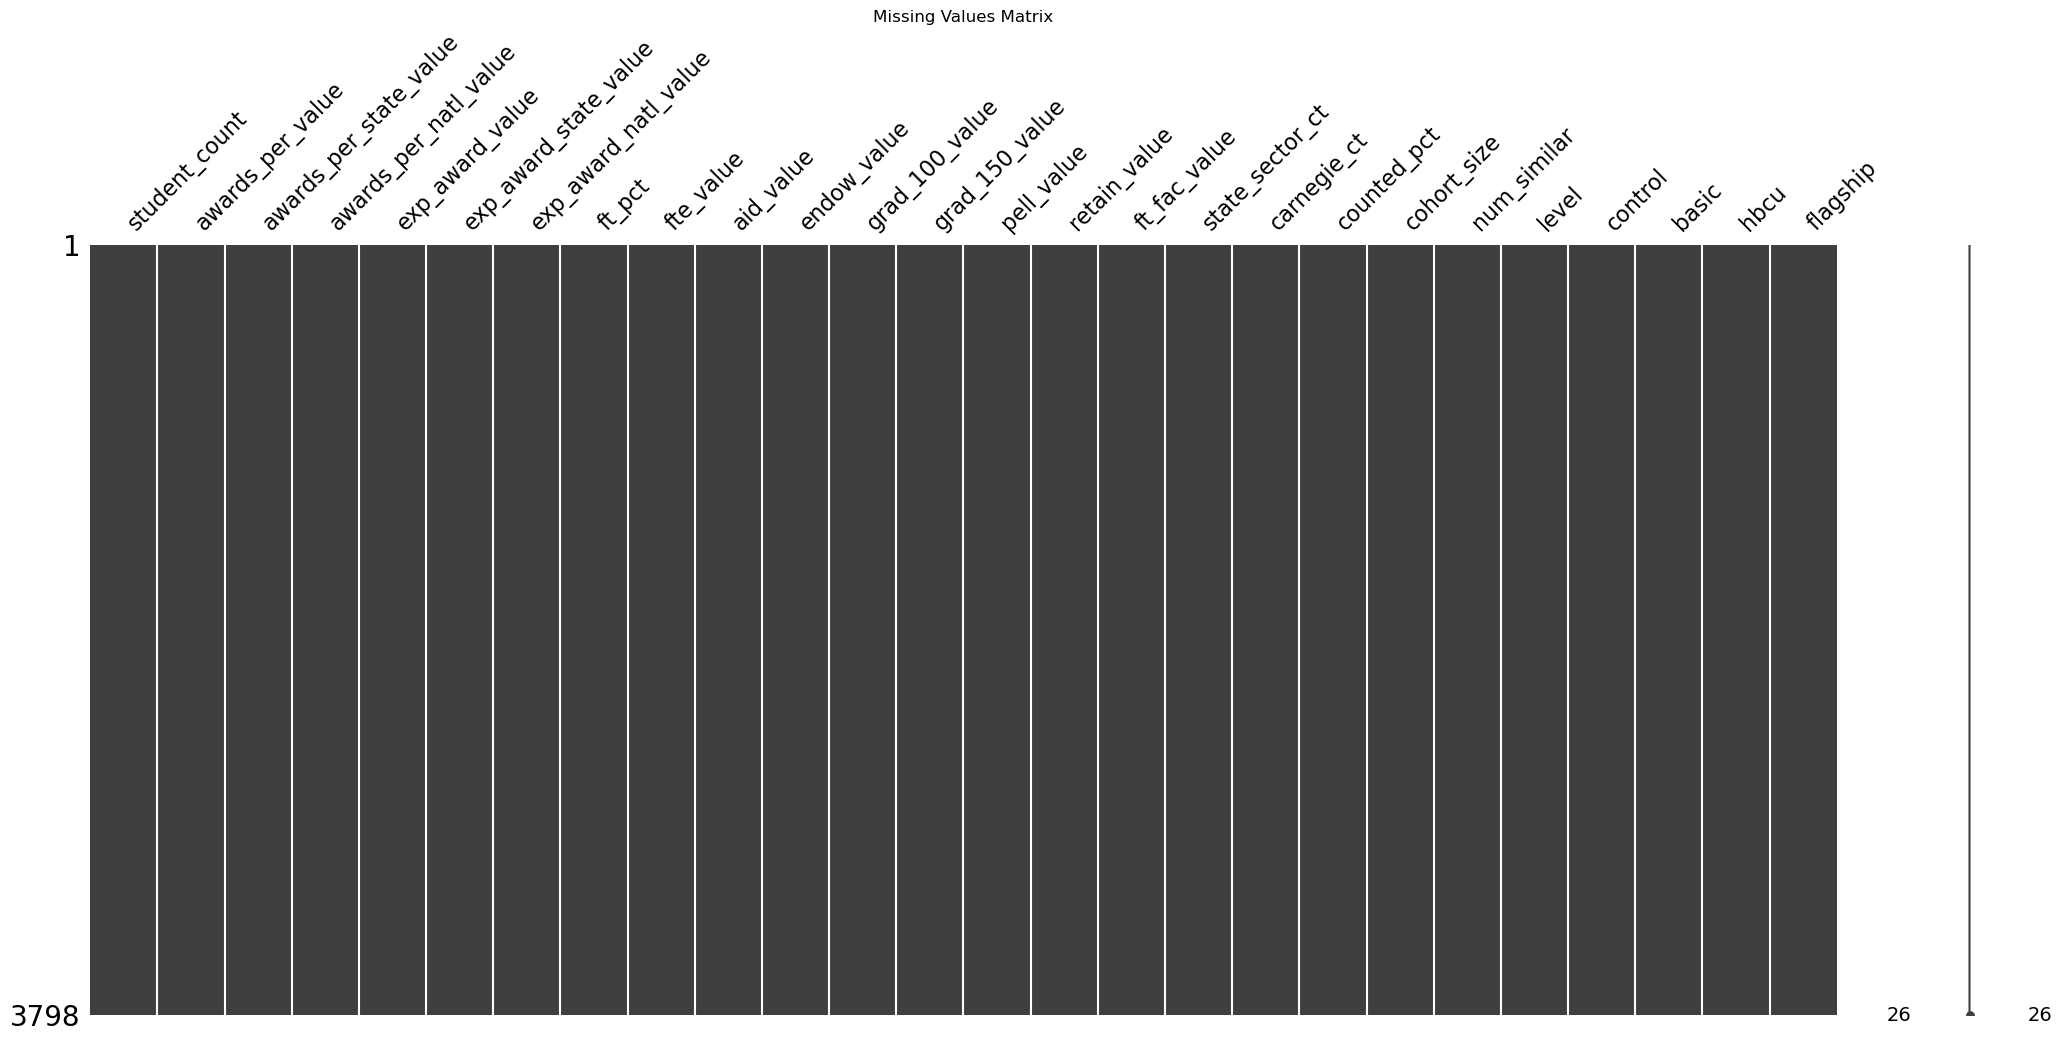

In [9]:
msno.matrix(df)
plt.title("Missing Values Matrix")
plt.show();

**Encoding Features:**

In [10]:
df.level.unique()

array(['4-year', '2-year'], dtype=object)

In [11]:
#OneHot encoding 
df = pd.get_dummies(df, columns=['level'], drop_first=False, prefix='level')

#Rename
df.rename(columns={
    'level_2-year':'2_yr_inst',
    'level_4-year':'4_yr_inst'
}, inplace=True)

In [12]:
df.control.unique()

array(['Public', 'Private not-for-profit', 'Private for-profit'],
      dtype=object)

In [13]:
df = pd.get_dummies(df, columns=['control'], drop_first=False, prefix='c')
#Rename
df.rename(columns={
    'c_Public':'public',
    'c_Private not-for-profit':'private',
    'c_Private for-profit':'private_fp'
}, inplace=True)

In [14]:
df.hbcu.unique()

array(['yes', 'no'], dtype=object)

In [15]:
df = pd.get_dummies(df, columns=['hbcu'], drop_first=False)

In [16]:
df.flagship.unique()

array(['no', 'yes'], dtype=object)

In [17]:
df = pd.get_dummies(df, columns=['flagship'], drop_first=False)

In [18]:
print(df.columns)

Index(['student_count', 'awards_per_value', 'awards_per_state_value',
       'awards_per_natl_value', 'exp_award_value', 'exp_award_state_value',
       'exp_award_natl_value', 'ft_pct', 'fte_value', 'aid_value',
       'endow_value', 'grad_100_value', 'grad_150_value', 'pell_value',
       'retain_value', 'ft_fac_value', 'state_sector_ct', 'carnegie_ct',
       'counted_pct', 'cohort_size', 'num_similar', 'basic', '2_yr_inst',
       '4_yr_inst', 'private_fp', 'private', 'public', 'hbcu_no', 'hbcu_yes',
       'flagship_no', 'flagship_yes'],
      dtype='object')


In [19]:
counts = df.basic.value_counts()
print(counts)

basic
Associates--Private For-profit                                                  517
Masters Colleges and Universities--larger programs                              386
Baccalaureate Colleges--Diverse Fields                                          343
Associates--Public Rural-serving Medium                                         289
Baccalaureate Colleges--Arts & Sciences                                         252
Masters Colleges and Universities--medium programs                              169
Associates--Public Rural-serving Large                                          128
Associates--Public Urban-serving Multicampus                                    125
Baccalaureate/Associates Colleges                                               124
Schools of art- music- and design                                               114
Associates--Public Rural-serving Small                                          111
Associates--Public Suburban-serving Single Campus                     

In [20]:
#Limit columns in 'basic'
mask = df['basic'].isin(counts[counts <=114].index)
df['basic'][mask] = 'Other'
print(df.basic.unique())

['Masters Colleges and Universities--larger programs' 'Other'
 'Baccalaureate Colleges--Arts & Sciences'
 'Associates--Public Rural-serving Medium'
 'Baccalaureate Colleges--Diverse Fields'
 'Baccalaureate/Associates Colleges'
 'Associates--Public Rural-serving Large'
 'Associates--Public Urban-serving Multicampus'
 'Masters Colleges and Universities--medium programs'
 'Associates--Private For-profit']


C:\Users\MTIDES\AppData\Local\Temp\ipykernel_30248\3175521071.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['basic'][mask] = 'Other'


In [21]:
#OneHot encoding 
df = pd.get_dummies(df, columns=['basic'], drop_first=False, prefix='B')

#Rename
df.rename(columns={
    'B_Masters Colleges and Universities--larger programs':'masters_lp',
    'B_Baccalaureate Colleges--Arts & Sciences':'bachelors_as',
    'B_Associates--Public Rural-serving Medium':'associates_pr_sm',
    'B_Baccalaureate Colleges--Diverse Fields':'bacelors_df',
    'B_Baccalaureate/Associates Colleges':'bachelors_associates',
    'B_Associates--Public Rural-serving Large':'associates_pr_sl',
    'B_Associates--Public Urban-serving Multicampus':'associates_pu_multi',
    'B_Masters Colleges and Universities--medium programs':'masters_mp',
    'B_Associates--Private For-profit':'associates_privatefp',
    'B_Other':'Other_institutions'
}, inplace=True)

In [22]:
# Convert boolean features to binary (0 and 1)
for feature in df.select_dtypes(include=['bool']):
    df[feature] = df[feature].astype(int)

In [23]:
cols_to_convert = ['cohort_size', 'num_similar', 'grad_100_value', 'grad_150_value', 'retain_value', 'student_count', 
                   'awards_per_value', 'fte_value', 'exp_award_state_value', 'exp_award_natl_value']
df[cols_to_convert] = df[cols_to_convert].astype(int)

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3798 entries, 0 to 3797
Data columns (total 40 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   student_count           3798 non-null   int32  
 1   awards_per_value        3798 non-null   int32  
 2   awards_per_state_value  3798 non-null   float64
 3   awards_per_natl_value   3798 non-null   float64
 4   exp_award_value         3798 non-null   float64
 5   exp_award_state_value   3798 non-null   int32  
 6   exp_award_natl_value    3798 non-null   int32  
 7   ft_pct                  3798 non-null   float64
 8   fte_value               3798 non-null   int32  
 9   aid_value               3798 non-null   float64
 10  endow_value             3798 non-null   float64
 11  grad_100_value          3798 non-null   int32  
 12  grad_150_value          3798 non-null   int32  
 13  pell_value              3798 non-null   float64
 14  retain_value            3798 non-null   

## Correlation between Features

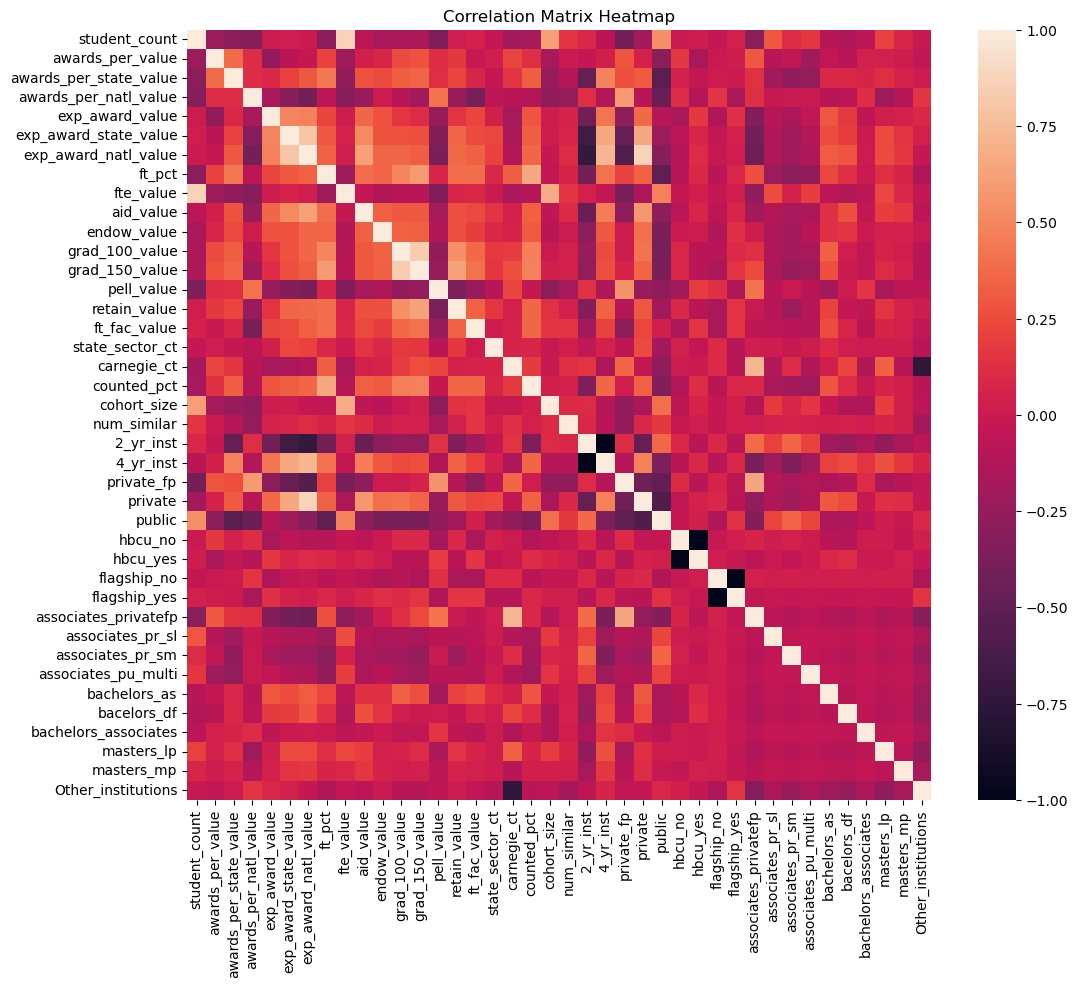

In [25]:
# A heatmap of correlation between features
plt.figure(figsize=(12, 10))
sns.heatmap(df.corr(), fmt='.2f')
plt.title('Correlation Matrix Heatmap')
plt.show();

## Train/Test Split

In [26]:
from sklearn.pipeline import Pipeline
X, y = make_classification(random_state=21)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=21)
pipe = make_pipeline(StandardScaler(), LogisticRegression())
pipe.fit(X_train, y_train)  # apply scaling on training data
print(Pipeline(steps=[
    ('standardscaler', StandardScaler()),
    ('logisticregression', LogisticRegression())]))

score = pipe.score(X_test, y_test) # apply scaling on test data without leaking training data
print("Test Score: ", score)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('logisticregression', LogisticRegression())])
Test Score:  0.88


- the model correctly predicted the class labels for 88% of the test samples, which can be considered to be quite good.

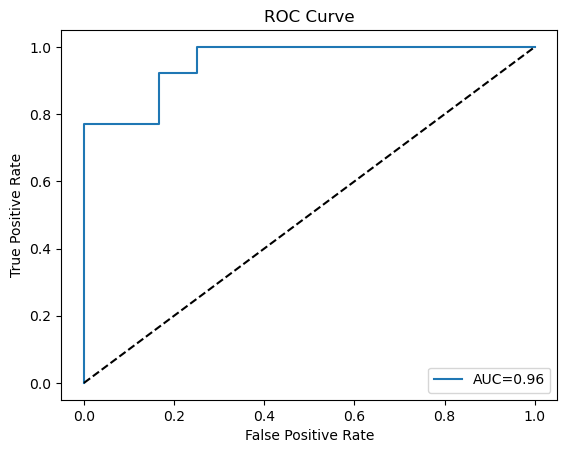

In [27]:
from sklearn.metrics import roc_curve, roc_auc_score
# Predict probabilities for testing data
probs = pipe.predict_proba(X_test)

# Compute ROC and AUC score
fpr, tpr, thresholds = roc_curve(y_test, probs[:, 1])
auc_score = roc_auc_score(y_test, probs[:, 1])

# Plot the ROC curve
plt.plot(fpr, tpr, label='AUC={:.2F}'.format(auc_score))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show();

- AUC = 0.96 which indicates that the model has a high TPR while maintaining a low FPR.

In [28]:
len(df) * .8, len(df) * .2

(3038.4, 759.6)

In [29]:
X = df.drop(columns=['awards_per_value'])
y = df['awards_per_value']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 21)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((3038, 39), (760, 39), (3038,), (760,))

**Scaling features:**

In [30]:
scaler = StandardScaler().set_output(transform='pandas') # transform the resulting array into a pandas DataFrame
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [31]:
scaler.mean_

array([2.54859842e+03, 2.09566159e+01, 2.28021780e+01, 5.35923751e+04,
       5.77587400e+04, 6.08684095e+04, 7.12277079e+01, 2.15892265e+03,
       6.25454285e+03, 8.73728073e+03, 2.73953259e+01, 4.18502304e+01,
       4.77617420e+01, 6.68146807e+01, 4.49762310e+01, 2.91343172e+01,
       2.30540158e+02, 5.77502703e+01, 4.30164911e+02, 1.88479263e+01,
       3.78538512e-01, 6.21461488e-01, 2.63001975e-01, 3.25872284e-01,
       4.11125741e-01, 9.73996050e-01, 2.60039500e-02, 9.85516787e-01,
       1.44832126e-02, 1.32982225e-01, 3.42330481e-02, 7.50493746e-02,
       3.19289006e-02, 6.51744569e-02, 9.15075708e-02, 3.25872284e-02,
       9.97366689e-02, 4.44371297e-02, 3.92363397e-01])

In [32]:
# Standard deviation values
scaler.scale_

array([2.62344218e+03, 3.42993531e+00, 9.74398293e-01, 2.97800090e+04,
       2.74250312e+04, 2.97677410e+04, 2.50022490e+01, 2.06058425e+03,
       3.34155385e+03, 7.94485084e+03, 2.16299159e+01, 2.24645640e+01,
       1.99589151e+01, 1.45779856e+01, 2.47292015e+01, 1.97816388e+01,
       1.56439316e+02, 2.39380073e+01, 3.71051071e+02, 4.65984987e+00,
       4.85022790e-01, 4.85022790e-01, 4.40263485e-01, 4.68699839e-01,
       4.92037972e-01, 1.59146928e-01, 1.59146928e-01, 1.19471541e-01,
       1.19471541e-01, 3.39555523e-01, 1.81827243e-01, 2.63470996e-01,
       1.75810824e-01, 2.46833440e-01, 2.88329560e-01, 1.77553657e-01,
       2.99648570e-01, 2.06064240e-01, 4.88276931e-01])

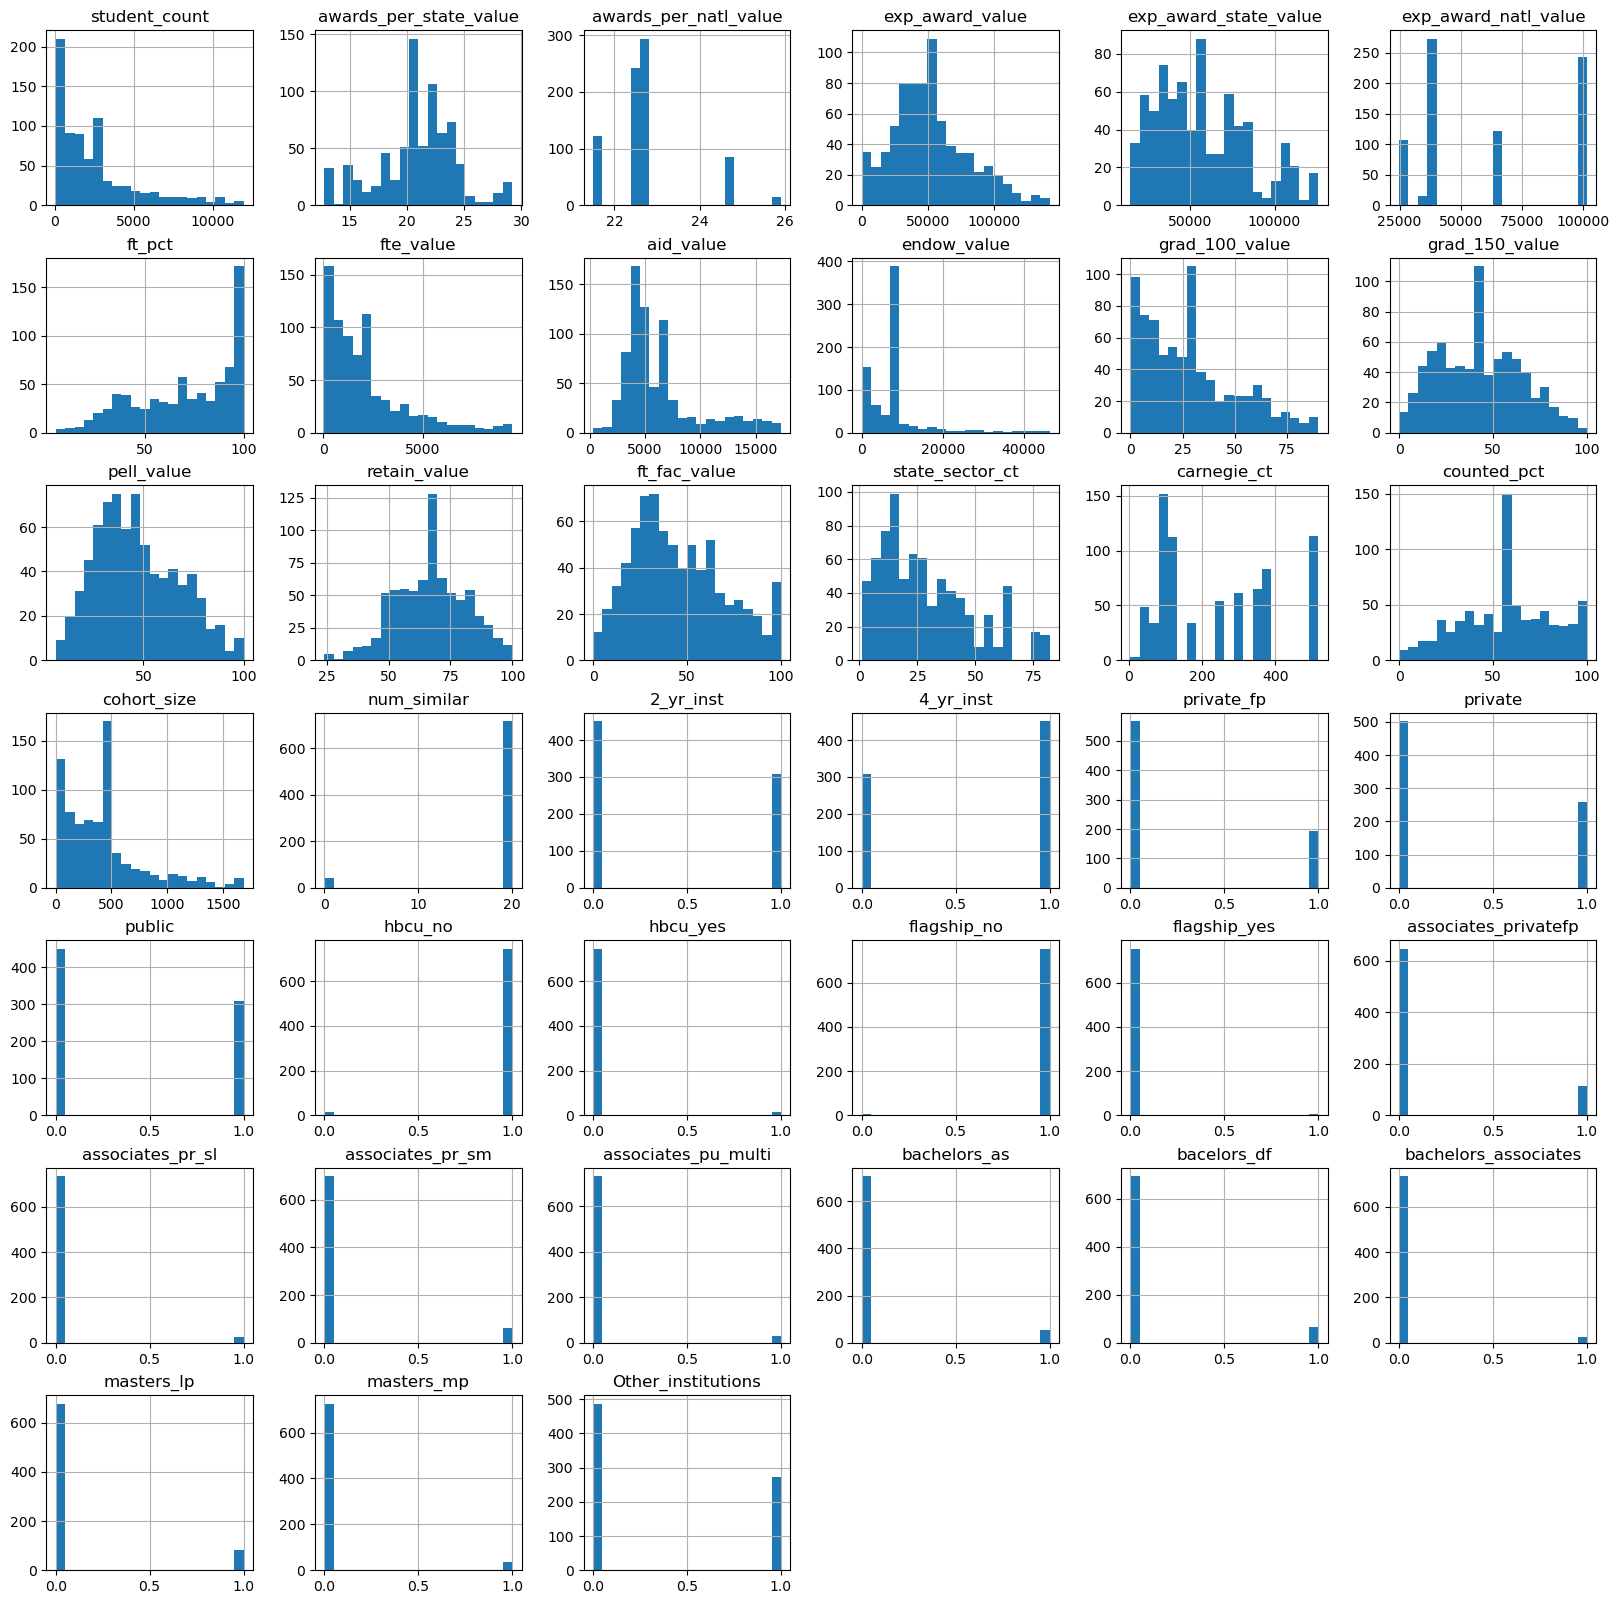

In [33]:
# Histograms of the original data
X_test.hist(bins=20, figsize=(20,20))
plt.show();

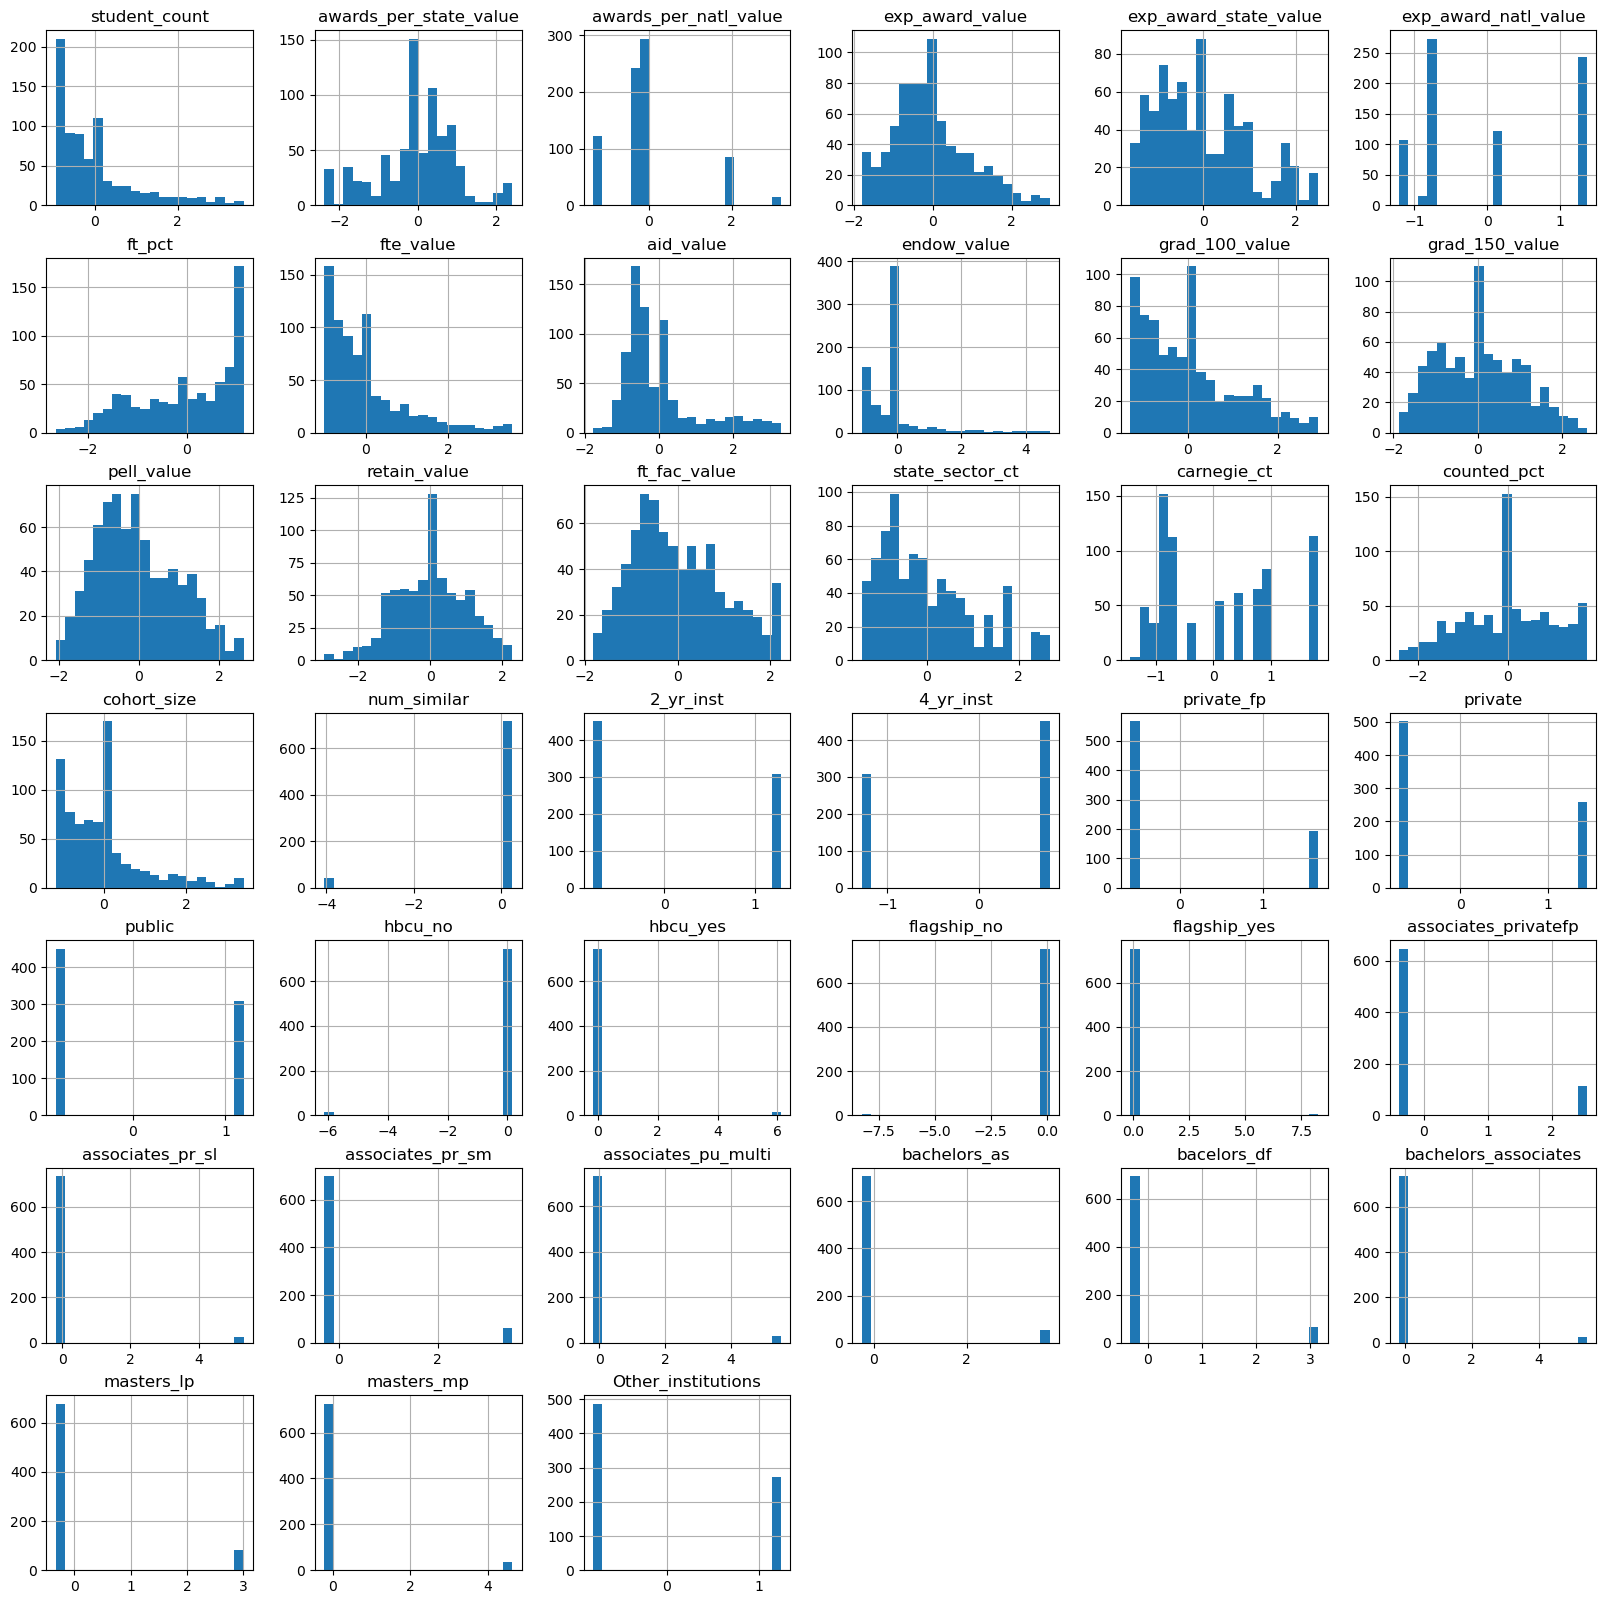

In [34]:
# Histograms of scaled data
X_test_scaled.hist(bins=20, figsize=(20,20))
plt.show();

## Save Pre-processed dataset to csv file

In [35]:
df.to_csv('preprocessed_collegedata.csv', index=False)